# MIT 6.867 Final Project: Data Exploration
Irina Degtiar



In [3]:
##########################################################################################################
### Set up workspace
##########################################################################################################
# Ensure re-load of all code
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Import libraries - general
import numpy as np
import pylab as pl
import pandas as pd
import random
import sklearn.metrics

# Import libraries - plotting
import seaborn as sns
import matplotlib
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

import missingno as msno

In [5]:
##########################################################################################################
### Load data
##########################################################################################################
train = pd.read_csv('../Data/train.csv', keep_default_na=False,  na_values='-1')
test = pd.read_csv('../Data/test.csv', keep_default_na=False,  na_values='-1')

In [88]:
##########################################################################################################
### Examine data
##########################################################################################################
print("# observations: ", train.shape[0])
train[0:10]


# observations:  595212


,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2.0,5,1.0,0.0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1.0,7,0.0,0.0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4.0,9,1.0,0.0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1.0,2,0.0,0.0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2.0,0,1.0,0.0,1,0,0,...,3,1,1,3,0,0,0,1,1,0
5,19,0,5,1.0,4,0.0,0.0,0,0,0,...,4,2,0,9,0,1,0,1,1,1
6,20,0,2,1.0,3,1.0,0.0,0,1,0,...,3,0,0,10,0,1,0,0,1,0
7,22,0,5,1.0,4,0.0,0.0,1,0,0,...,7,1,3,6,1,0,1,0,1,0
8,26,0,5,1.0,3,1.0,0.0,0,0,1,...,4,2,1,5,0,1,0,0,0,1
9,28,1,1,1.0,2,0.0,0.0,0,1,0,...,3,5,0,6,0,1,0,0,1,0


In [32]:
train.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,594996.000000,595212.000000,595129.000000,589403.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.359799,4.423318,0.416992,0.419038,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.663193,2.699902,0.493062,1.350023,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
# Are all column values the same?
train.max(axis=0)==train.min(axis=0)

id                False
target            False
ps_ind_01         False
ps_ind_02_cat     False
ps_ind_03         False
ps_ind_04_cat     False
ps_ind_05_cat     False
ps_ind_06_bin     False
ps_ind_07_bin     False
ps_ind_08_bin     False
ps_ind_09_bin     False
ps_ind_10_bin     False
ps_ind_11_bin     False
ps_ind_12_bin     False
ps_ind_13_bin     False
ps_ind_14         False
ps_ind_15         False
ps_ind_16_bin     False
ps_ind_17_bin     False
ps_ind_18_bin     False
ps_reg_01         False
ps_reg_02         False
ps_reg_03         False
ps_car_01_cat     False
ps_car_02_cat     False
ps_car_03_cat     False
ps_car_04_cat     False
ps_car_05_cat     False
ps_car_06_cat     False
ps_car_07_cat     False
ps_car_08_cat     False
ps_car_09_cat     False
ps_car_10_cat     False
ps_car_11_cat     False
ps_car_11         False
ps_car_12         False
ps_car_13         False
ps_car_14         False
ps_car_15         False
ps_calc_01        False
ps_calc_02        False
ps_calc_03      

TO DO: Indicators need to be created for the categorical variables

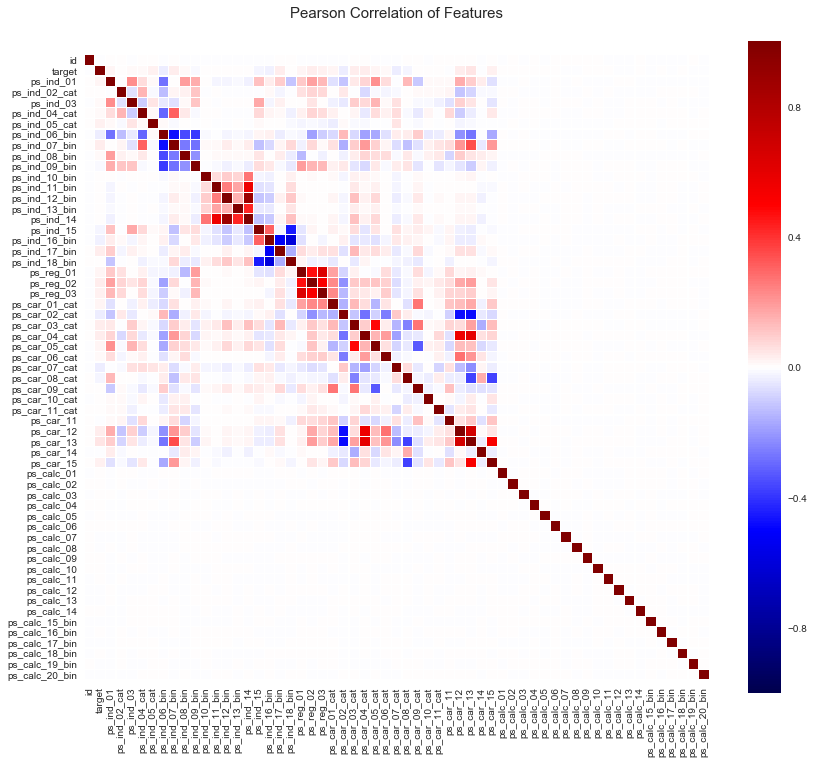

In [20]:
##########################################################################################################
### Pearson Correlation Heatmap
##########################################################################################################
# Calculate correlation
corr = train.astype(float).corr()

# Plot
colormap = plt.cm.seismic
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(corr,linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=False)

In [29]:
# Largest correlations
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, dfcorrelation_matrix, n=5):
    au_corr = dfcorrelation_matrix.abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(train, corr, 10))


Top Absolute Correlations
ps_ind_12_bin  ps_ind_14        0.890127
ps_car_12      ps_car_13        0.671720
ps_reg_01      ps_reg_03        0.637035
ps_car_04_cat  ps_car_13        0.595173
ps_ind_16_bin  ps_ind_18_bin    0.594265
ps_car_04_cat  ps_car_12        0.570028
ps_ind_11_bin  ps_ind_14        0.564903
ps_car_13      ps_car_15        0.529519
ps_ind_16_bin  ps_ind_17_bin    0.518076
ps_reg_02      ps_reg_03        0.516457
dtype: float64


No one feature is strongly correlated with the target. Between features, there exists some strong linear correlations; particularly between ps_ind_12_bin and ps_ind_14 (89%); other features have absolute correlations below 70%. We should consider L2 regularization or PCA.  

Variables ps_calc_01 through ps_calc_20_bin appear to have no correlation with the target or other variables by themselves - but they do show a pattern after examining 2-way interactions (see below).

C:\Users\Irina\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\Irina\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


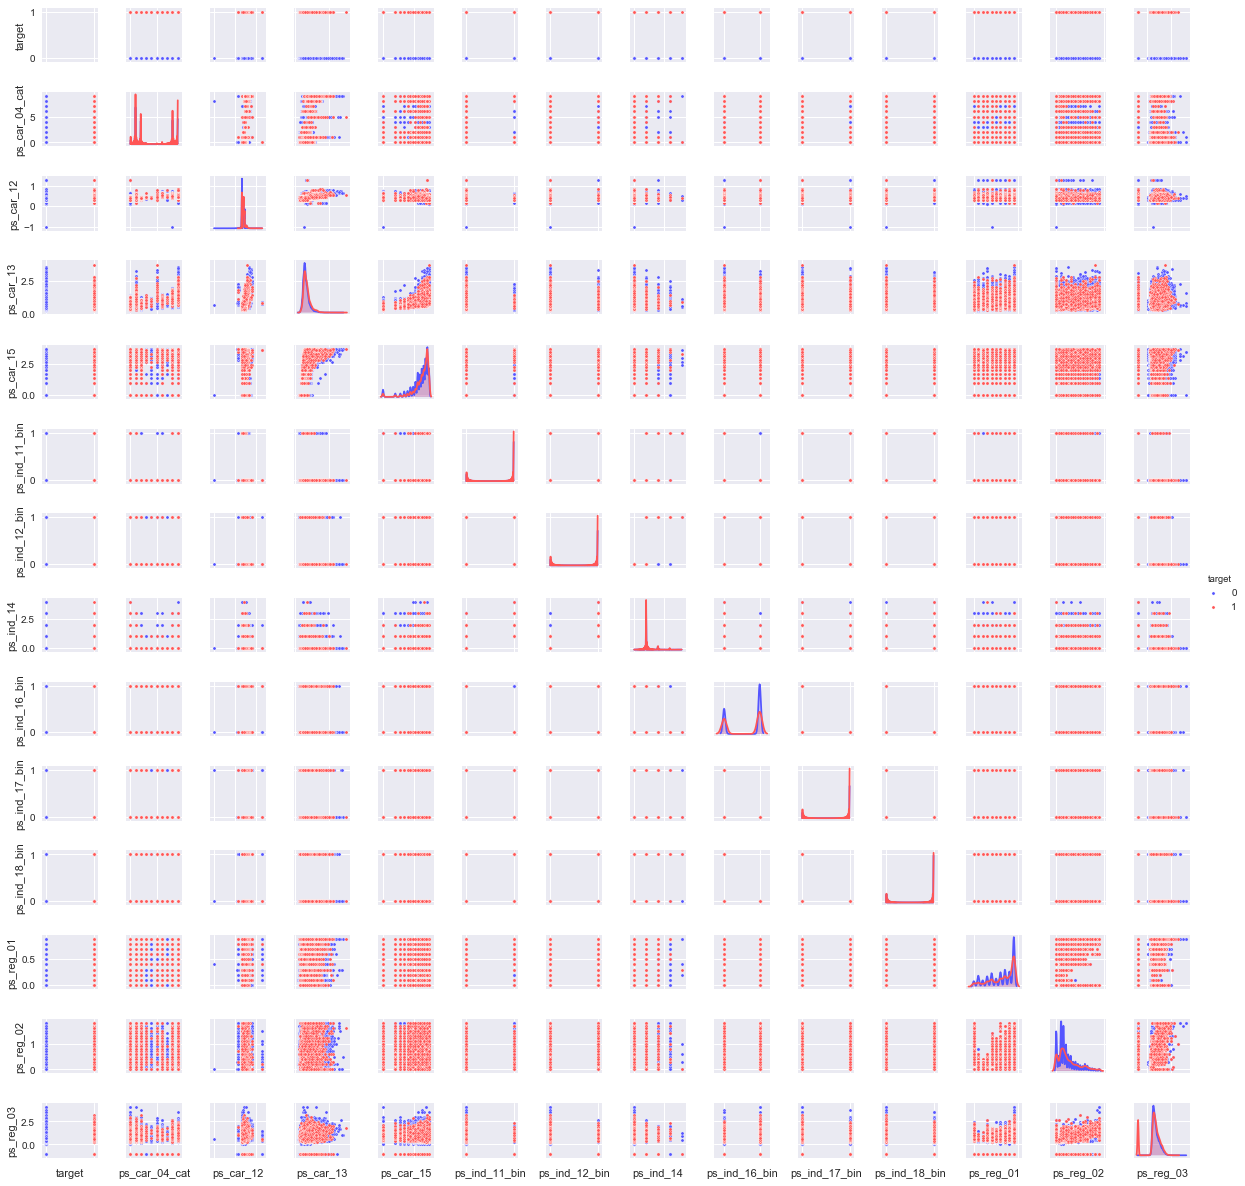

In [33]:
##########################################################################################################
### Pairwise distributions - correlated variables
##########################################################################################################
### Correlated variables
plot_pairwise = sns.pairplot(train[[u'target', u'ps_car_04_cat', u'ps_car_12', u'ps_car_13', u'ps_car_15', u'ps_ind_11_bin', \
       u'ps_ind_12_bin', u'ps_ind_14', u'ps_ind_16_bin', u'ps_ind_17_bin', u'ps_ind_18_bin', u'ps_reg_01', \
       u'ps_reg_02', u'ps_reg_03']], hue='target', palette = 'seismic', size=1.2, diag_kind = 'kde', \
       diag_kws=dict(shade=True),plot_kws=dict(s=10) )
plot_pairwise.set(xticklabels=[])



Some features appear to have a meaningful interaction that generates seperability of the target values, e.g., ps_car_15 and ps_car_13, ps_reg_03 and ps_car_13, ps_ind_11_bin and ps_ind_16_bin  
TO DO: create interaction terms for linear models.

C:\Users\Irina\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\Irina\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


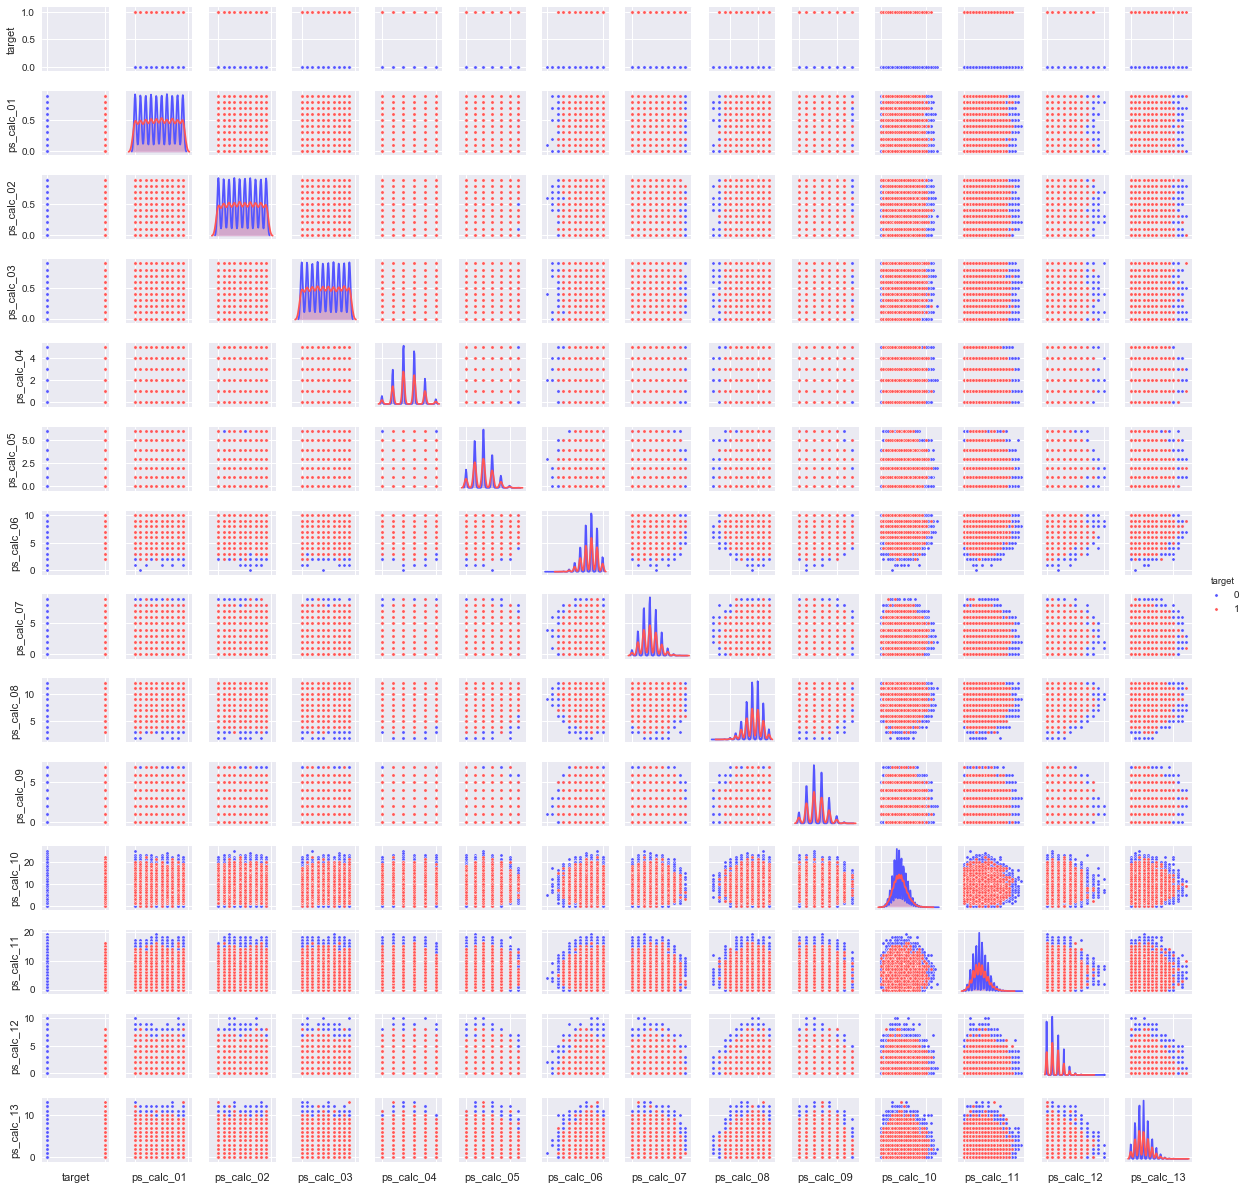

In [82]:
##########################################################################################################
### Pairwise distributions - uncorrelated variables
##########################################################################################################
### Correlated variables
plot_pairwise = sns.pairplot(train[[u'target', u'ps_calc_01', u'ps_calc_02', u'ps_calc_03', u'ps_calc_04', u'ps_calc_05', \
       u'ps_calc_06', u'ps_calc_07', u'ps_calc_08', u'ps_calc_09', u'ps_calc_10', u'ps_calc_11', \
       u'ps_calc_12', u'ps_calc_13']], hue='target', palette = 'seismic', size=1.2, diag_kind = 'kde', \
       diag_kws=dict(shade=True),plot_kws=dict(s=10) )
plot_pairwise.set(xticklabels=[])


There appear to be interactions between the uncorrelated variables as well, e.g., ps_calc_11 and ps_calc_06

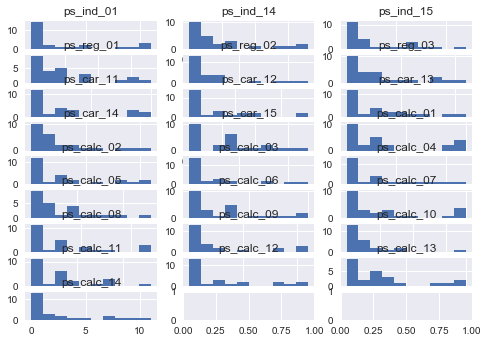

In [63]:
##########################################################################################################
### Distribution of continuous variables - outliers?
##########################################################################################################
# Continuous variables
cont_var1 = ['ps_ind_01', 'ps_ind_14', 'ps_ind_15', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_11', 'ps_car_12', \
            'ps_car_13', 'ps_car_14', 'ps_car_15'] 
cont_var2 = ['ps_calc_0'+str(i) for i in range(1,10)]
cont_var3 = ['ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14']
cont_var = cont_var1 + cont_var2 + cont_var3


# Plot
import math
math.ceil(len(cont_var)/3)

fig, axes = plt.subplots(nrows=math.ceil(len(cont_var)/3), ncols=3, sharex=False)

titles = cont_var
y_vals = train[cont_var].values

# axes.flat returns the set of axes as a flat (1D) array
for ax, title, y in zip(axes.flat, titles, y_vals):
    ax.hist(y[~np.isnan(y)])
    ax.set_title(title)
    ax.grid(True)

There is no evidence of outliers among the continous variables. All continous variables have a skewed, zero-inflated distribution. 

In [89]:
##########################################################################################################
### Missing data
##########################################################################################################
# Print peprcent missing overall and for each column
train_sortedByMissing = msno.nullity_sort(train, sort='ascending') # Sort by missingness
train_missing = train_sortedByMissing[train_sortedByMissing.isnull().any(axis=1)] # Missing at least one value
print("Any missing: ", train_missing.shape[0]/train_sortedByMissing.shape[0])

print("Percent missing by column")
train_sortedByMissing.isnull().sum()/train_sortedByMissing.shape[0]

Any missing:  0.7901067182785293
Percent missing by column


id                0.000000
target            0.000000
ps_ind_01         0.000000
ps_ind_02_cat     0.000363
ps_ind_03         0.000000
ps_ind_04_cat     0.000139
ps_ind_05_cat     0.009760
ps_ind_06_bin     0.000000
ps_ind_07_bin     0.000000
ps_ind_08_bin     0.000000
ps_ind_09_bin     0.000000
ps_ind_10_bin     0.000000
ps_ind_11_bin     0.000000
ps_ind_12_bin     0.000000
ps_ind_13_bin     0.000000
ps_ind_14         0.000000
ps_ind_15         0.000000
ps_ind_16_bin     0.000000
ps_ind_17_bin     0.000000
ps_ind_18_bin     0.000000
ps_reg_01         0.000000
ps_reg_02         0.000000
ps_reg_03         0.181065
ps_car_01_cat     0.000180
ps_car_02_cat     0.000008
ps_car_03_cat     0.690898
ps_car_04_cat     0.000000
ps_car_05_cat     0.447825
ps_car_06_cat     0.000000
ps_car_07_cat     0.019302
ps_car_08_cat     0.000000
ps_car_09_cat     0.000956
ps_car_10_cat     0.000000
ps_car_11_cat     0.000000
ps_car_11         0.000008
ps_car_12         0.000002
ps_car_13         0.000000
p

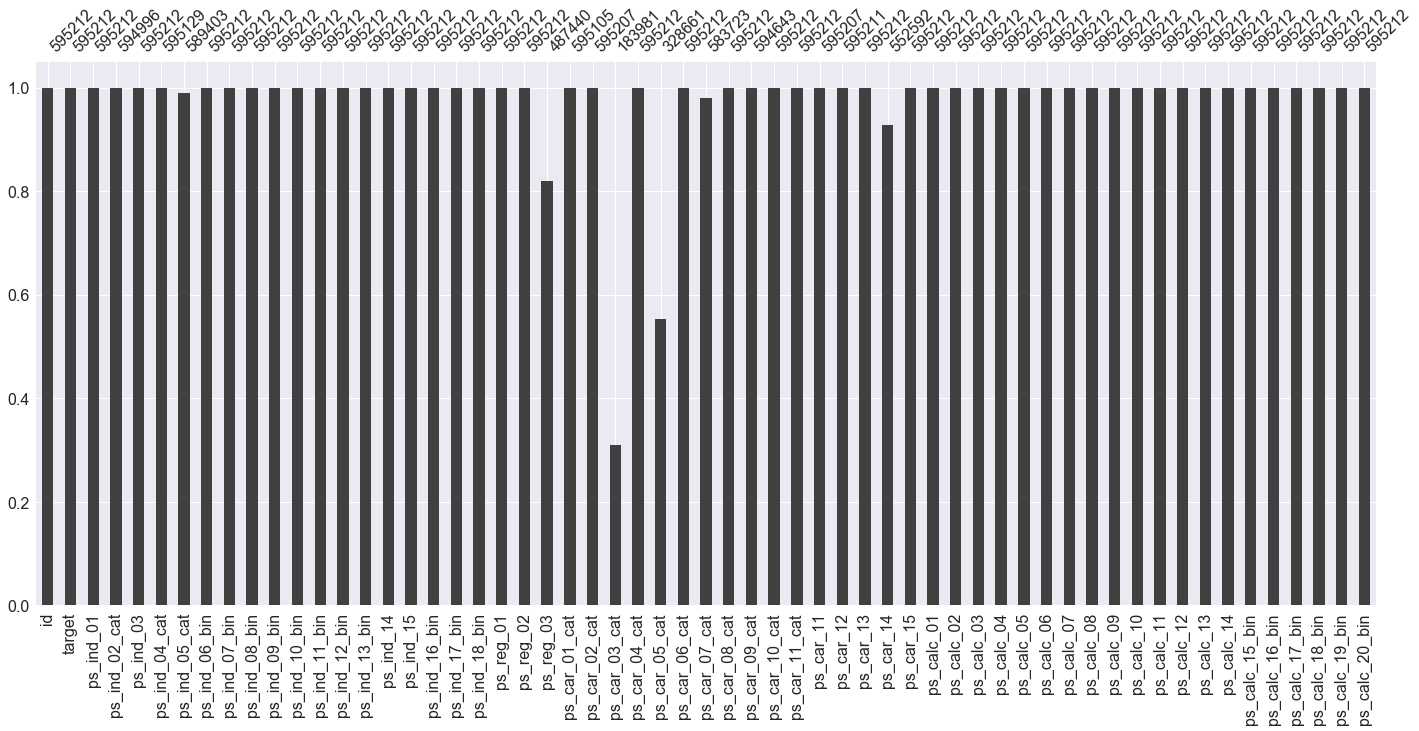

In [79]:
### Visualize missingness by column
msno.bar(train)

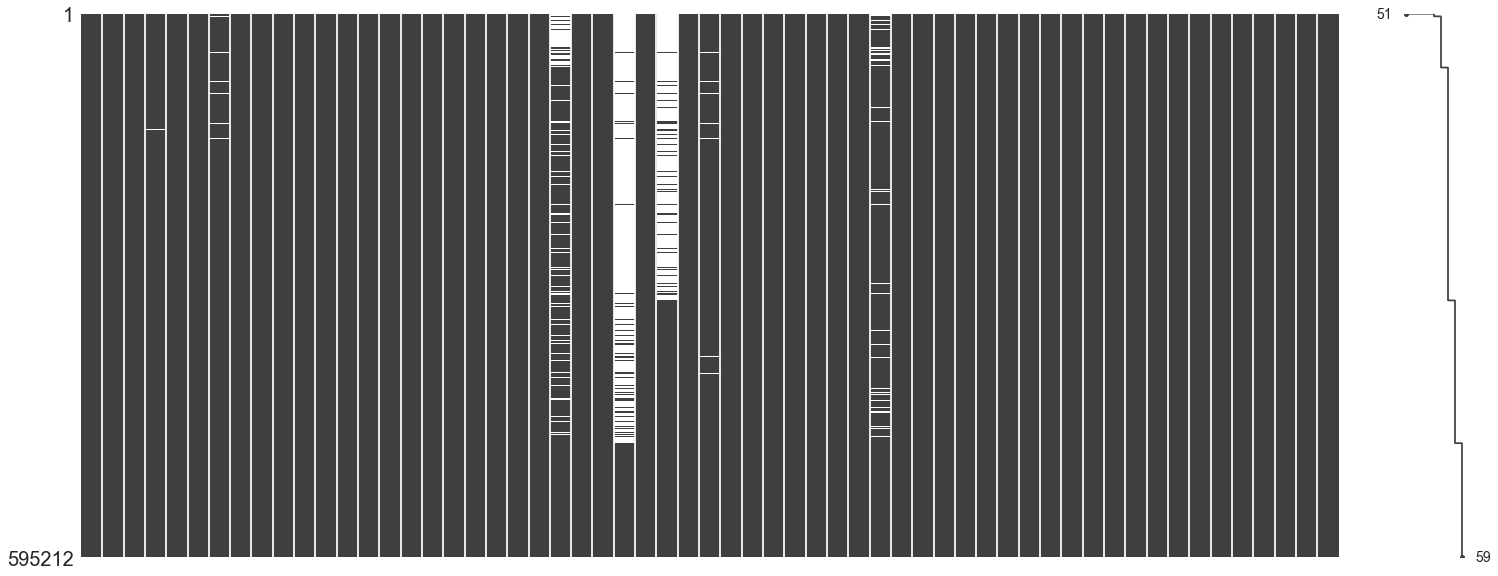

In [90]:
### Visualize missingness by subject, sorted from highest to lowest percent missingness
msno.matrix(train_sortedByMissing)

There is a high amount of missingness among some features (e.g., 69% for ps_car_03_cat) and a small amount among other features. There appears to be no trend between subjects.

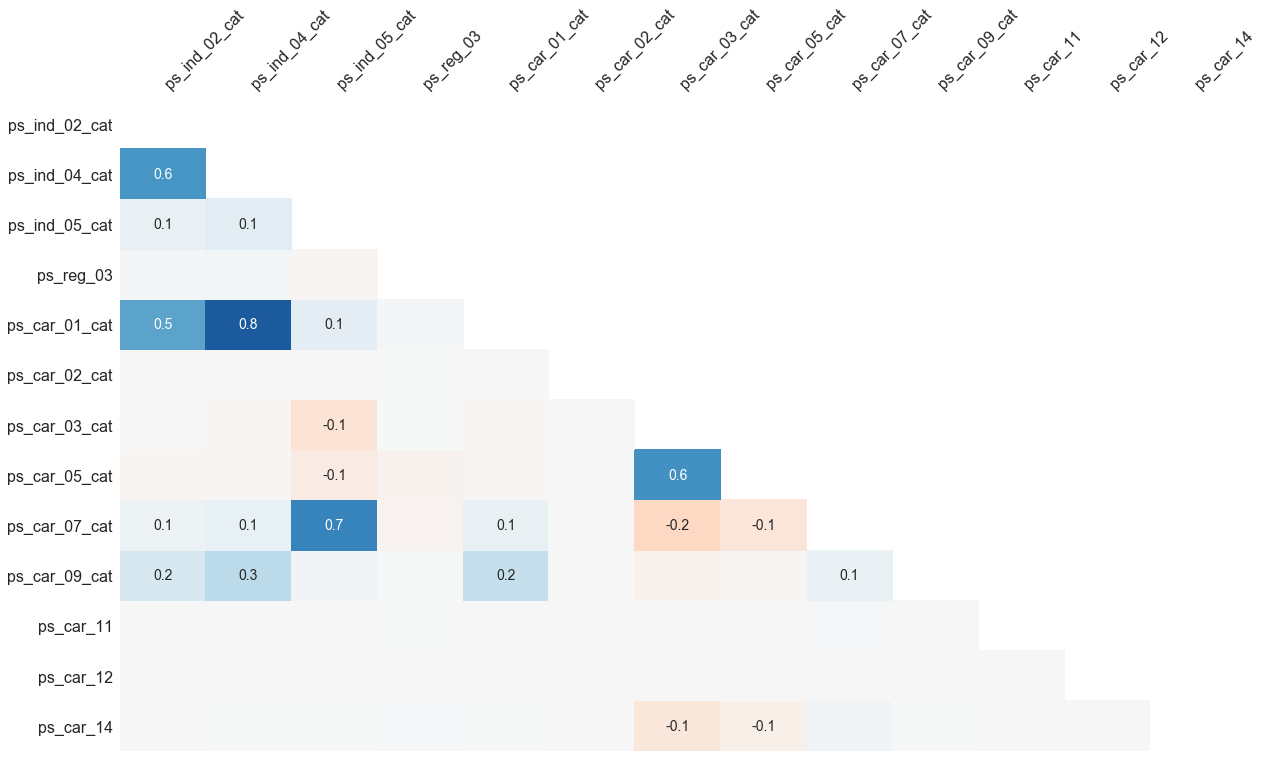

In [80]:
### Heatmap
msno.heatmap(train)

There is some correlation of missigness between variables.

In [60]:
### Add indicator for missing
train_missingindic = train.isnull().astype(int).add_suffix('_missing')
train1 = pd.concat([train, train_missingindic], axis=1)

In [81]:
### Correlations with missingness
corr_missing = train1.corr()
corr_missing.iloc[60:119,1] # Correlation with target (column 1)

target_missing                 NaN
ps_ind_01_missing              NaN
ps_ind_02_cat_missing     0.015122
ps_ind_03_missing              NaN
ps_ind_04_cat_missing     0.022758
ps_ind_05_cat_missing     0.024830
ps_ind_06_bin_missing          NaN
ps_ind_07_bin_missing          NaN
ps_ind_08_bin_missing          NaN
ps_ind_09_bin_missing          NaN
ps_ind_10_bin_missing          NaN
ps_ind_11_bin_missing          NaN
ps_ind_12_bin_missing          NaN
ps_ind_13_bin_missing          NaN
ps_ind_14_missing              NaN
ps_ind_15_missing              NaN
ps_ind_16_bin_missing          NaN
ps_ind_17_bin_missing          NaN
ps_ind_18_bin_missing          NaN
ps_reg_01_missing              NaN
ps_reg_02_missing              NaN
ps_reg_03_missing        -0.020209
ps_car_01_cat_missing     0.020128
ps_car_02_cat_missing    -0.000564
ps_car_03_cat_missing    -0.029844
ps_car_04_cat_missing          NaN
ps_car_05_cat_missing    -0.022772
ps_car_06_cat_missing          NaN
ps_car_07_cat_missin

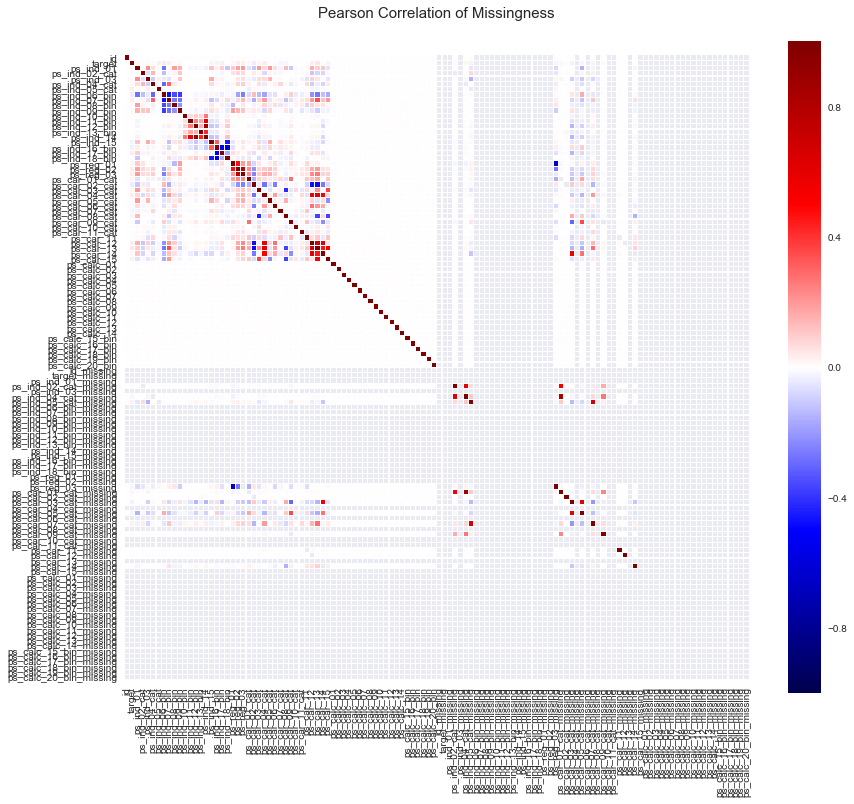

In [63]:
### Pearson Correlation Heatmap - Missingness
colormap = plt.cm.seismic
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Missingness', y=1.05, size=15)
sns.heatmap(corr_missing,linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=False)

Missingness is not strongly correlated with the target (max correlation 0.03 with ps_car_07_cat_missing).There is some correlation of missingness with feature values, and, as seen before, with other missing values. 

In [ ]:
##########################################################################################################
### Data transformation - scale data for use in algorithms
##########################################################################################################
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(train)
train_scaled = scaler.transform(train)